# Tarp Project

## Dataset

In [106]:
import numpy as np
import pandas as pd

In [107]:
dataset = pd.read_csv("C:/Users/cyril/PycharmProjects/Tarp/indiancrop_dataset.csv")
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,state,price,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice


In [108]:
dataset = dataset.drop(['state'],axis=1)

##Dataframe For Dataset

In [109]:
df1 = pd.DataFrame(dataset)
y=pd.DataFrame(df1['label'])
data=pd.DataFrame(df1.iloc[:,:-1])

In [110]:
df1

,N,P,K,temperature,humidity,ph,rainfall,price,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,120000,Rice
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,1500,Coffee


In [111]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   price        2200 non-null   int64  
 8   label        2200 non-null   object 
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


## Label Encoding

In [112]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [113]:
y = label_encoder.fit_transform(y)
y

C:\Users\cyril\OneDrive\Pictures\SEM 6\assignment\New\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([20, 20, 20, ...,  5,  5,  5])

## Dataset spliting

In [114]:

from sklearn.model_selection import train_test_split
x_train, x_test ,y_train ,y_test = train_test_split(data,y,test_size=0.2,random_state=50,stratify=y)


In [115]:
#N, P, K, temperature, humidity, ph, rainfall, price = df["N"].median(),  df["P"].median(),df["K"].median(),df["temperature"].median(),df["humidity"].median(),df["ph"].median(),df["rainfall"].median(),df["price"].median()


## Score

In [116]:
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report

def matrix(mod,y_pred):
    # Compute classification metrics
    print("Accuracy :",accuracy_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    # Plot the confusion matrix using seaborn
    plt.figure(figsize(8,8))
    sns.heatmap(cm, annot=True, fmt='d')

    print ('Classification Report \n: ',classification_report(y_test, y_pred))

## DecisionTreeClassifier

In [117]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

DT_entropy = DecisionTreeClassifier()



### Bagging

In [118]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
from sklearn import model_selection

In [119]:
# Create bagging classifier
baggingdl = BaggingClassifier(estimator= DT_entropy,n_estimators = 30, random_state = 50)

# Fit the model
baggingdl.fit(x_train, y_train)

# Append the model and score to their respective list
print(accuracy_score(y_true = y_test, y_pred = baggingdl.predict(x_test)))



0.9954545454545455


Accuracy : 0.9954545454545455
Classification Report 
:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00  

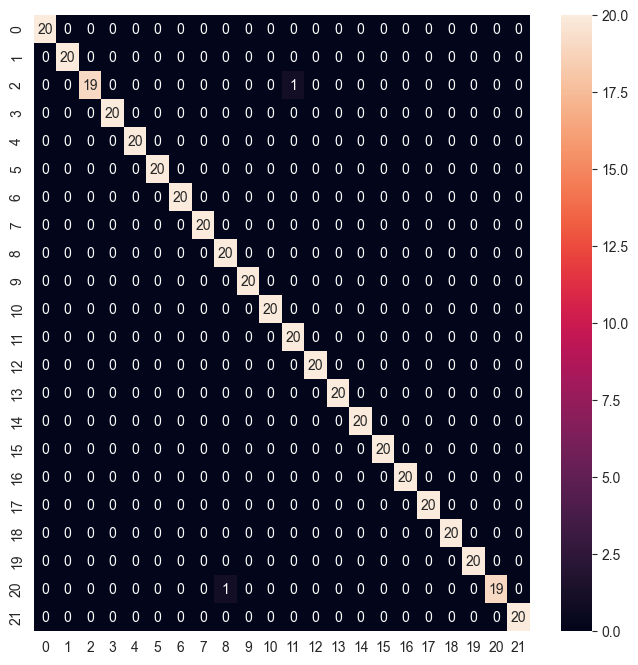

In [120]:
y_pred = baggingdl.predict(x_test)
matrix(baggingdl,y_pred)

### Boosting

In [121]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier with 50 base estimators
boostingdl = AdaBoostClassifier(estimator=baggingdl, n_estimators=30)

boostingdl.fit(x_train, y_train)

# Append the model and score to their respective list
print(accuracy_score(y_true = y_test, y_pred = boostingdl.predict(x_test)))

0.9931818181818182


In [122]:
y_pred = boostingdl.predict(x_test)
label_encoder.inverse_transform(y_pred)

array(['Lentil', 'Lentil', 'MothBeans', 'Papaya', 'Coconut', 'Orange',
       'Banana', 'MothBeans', 'Papaya', 'Apple', 'ChickPea', 'Maize',
       'Grapes', 'Jute', 'Maize', 'Coffee', 'Coconut', 'KidneyBeans',
       'MungBean', 'Pomegranate', 'Jute', 'Coconut', 'Grapes', 'ChickPea',
       'Coffee', 'MungBean', 'ChickPea', 'Coffee', 'Maize', 'Pomegranate',
       'Watermelon', 'MungBean', 'Papaya', 'Blackgram', 'Pomegranate',
       'Grapes', 'Mango', 'MothBeans', 'Watermelon', 'Pomegranate',
       'KidneyBeans', 'Blackgram', 'KidneyBeans', 'Watermelon',
       'Blackgram', 'Coconut', 'Grapes', 'KidneyBeans', 'Jute',
       'MungBean', 'Cotton', 'Banana', 'Orange', 'KidneyBeans', 'Maize',
       'ChickPea', 'Maize', 'Jute', 'Coconut', 'Maize', 'Rice', 'Jute',
       'Grapes', 'Papaya', 'Papaya', 'PigeonPeas', 'MothBeans',
       'Watermelon', 'Apple', 'Rice', 'Watermelon', 'Rice', 'Maize',
       'Muskmelon', 'Jute', 'Grapes', 'Mango', 'MothBeans', 'KidneyBeans',
       'Jute', 'Jut

Accuracy : 0.9931818181818182
Classification Report 
:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.91      1.00      0.95        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00  

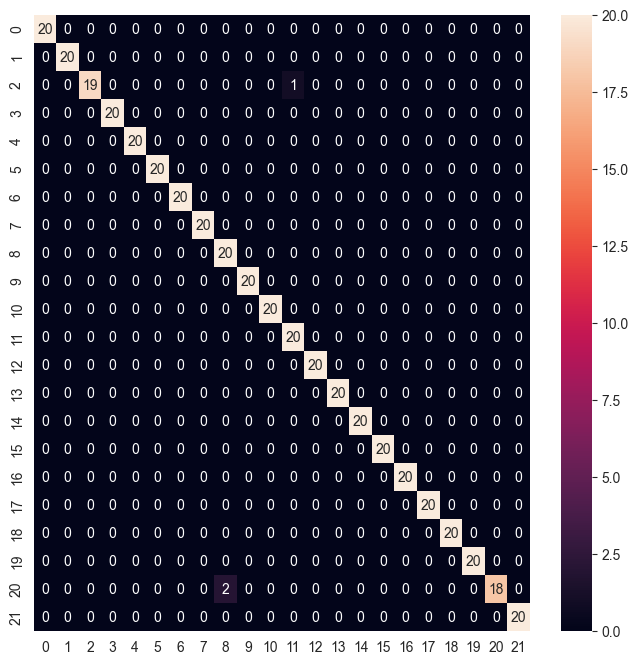

In [123]:
y_pred = boostingdl.predict(x_test)
matrix(boostingdl,y_pred)

## SVM

In [124]:
#SVM

from sklearn import svm

sv = svm.SVC(kernel='rbf', C=1e3,gamma='scale',probability=True)

### Bagging

In [125]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
from sklearn import model_selection

In [126]:
# Create bagging classifier
baggingsvm = BaggingClassifier(estimator= sv,n_estimators = 30, random_state = 22)

# Fit the model
baggingsvm.fit(x_train, y_train)

# Append the model and score to their respective list
print(accuracy_score(y_true = y_test, y_pred = baggingsvm.predict(x_test)))



0.9454545454545454


Accuracy : 0.9454545454545454
Classification Report 
:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.91      1.00      0.95        20
           3       1.00      1.00      1.00        20
           4       1.00      0.95      0.97        20
           5       1.00      1.00      1.00        20
           6       0.90      0.95      0.93        20
           7       1.00      1.00      1.00        20
           8       0.77      1.00      0.87        20
           9       1.00      0.90      0.95        20
          10       0.93      0.65      0.76        20
          11       0.95      0.90      0.92        20
          12       0.95      1.00      0.98        20
          13       0.79      0.95      0.86        20
          14       1.00      1.00      1.00        20
          15       1.00      0.95      0.97        20
          16       1.00  

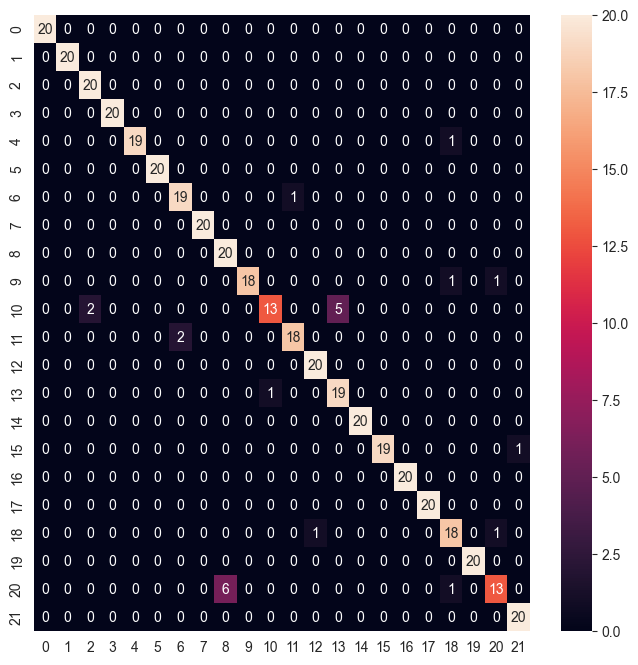

In [127]:
y_pred = baggingsvm.predict(x_test)
matrix(baggingsvm,y_pred)

## RandomForestClassifier

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
# Train a random forest regressor model
rf = RandomForestClassifier(n_estimators=300, criterion = "gini", random_state=50)

### Bagging

In [130]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
from sklearn import model_selection

In [131]:
# Create bagging classifier
baggingrf = BaggingClassifier(estimator= rf,n_estimators = 30, random_state = 50)

# Fit the model
baggingrf.fit(x_train, y_train)

# Append the model and score to their respective list
print(accuracy_score(y_true = y_test, y_pred = baggingrf.predict(x_test)))



0.9977272727272727


Accuracy : 0.9977272727272727
Classification Report 
:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00  

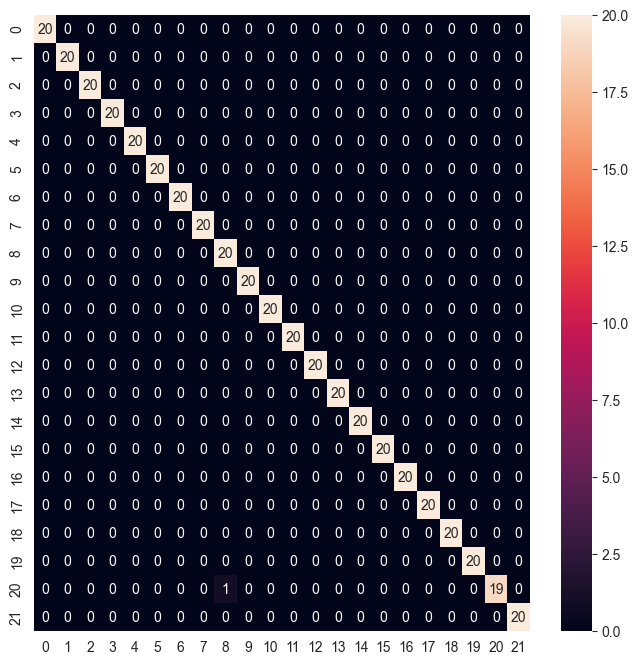

In [132]:
y_pred = baggingrf.predict(x_test)
matrix(baggingrf,y_pred)

### Boosting

In [133]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier with 50 base estimators
boostingrf = AdaBoostClassifier(estimator=baggingrf, n_estimators=30)

boostingrf.fit(x_train, y_train)

# Append the model and score to their respective list
print(accuracy_score(y_true = y_test, y_pred = boostingrf.predict(x_test)))

0.9977272727272727


In [134]:
y_pred = boostingrf.predict(x_test)
label_encoder.inverse_transform(y_pred)

array(['Lentil', 'Lentil', 'MothBeans', 'Papaya', 'Coconut', 'Orange',
       'Banana', 'MothBeans', 'Papaya', 'Apple', 'ChickPea', 'Maize',
       'Grapes', 'Jute', 'Maize', 'Coffee', 'Coconut', 'KidneyBeans',
       'MungBean', 'Pomegranate', 'Jute', 'Coconut', 'Grapes', 'ChickPea',
       'Coffee', 'MungBean', 'ChickPea', 'Coffee', 'Maize', 'Pomegranate',
       'Watermelon', 'MungBean', 'Papaya', 'Blackgram', 'Pomegranate',
       'Grapes', 'Mango', 'MothBeans', 'Watermelon', 'Pomegranate',
       'KidneyBeans', 'Blackgram', 'KidneyBeans', 'Watermelon',
       'Blackgram', 'Coconut', 'Grapes', 'KidneyBeans', 'Jute',
       'MungBean', 'Cotton', 'Banana', 'Orange', 'KidneyBeans', 'Maize',
       'ChickPea', 'Maize', 'Jute', 'Coconut', 'Maize', 'Rice', 'Jute',
       'Grapes', 'Papaya', 'Papaya', 'PigeonPeas', 'MothBeans',
       'Watermelon', 'Apple', 'Rice', 'Watermelon', 'Rice', 'Maize',
       'Muskmelon', 'Jute', 'Grapes', 'Mango', 'MothBeans', 'KidneyBeans',
       'Jute', 'Jut

Accuracy : 0.9977272727272727
Classification Report 
:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00  

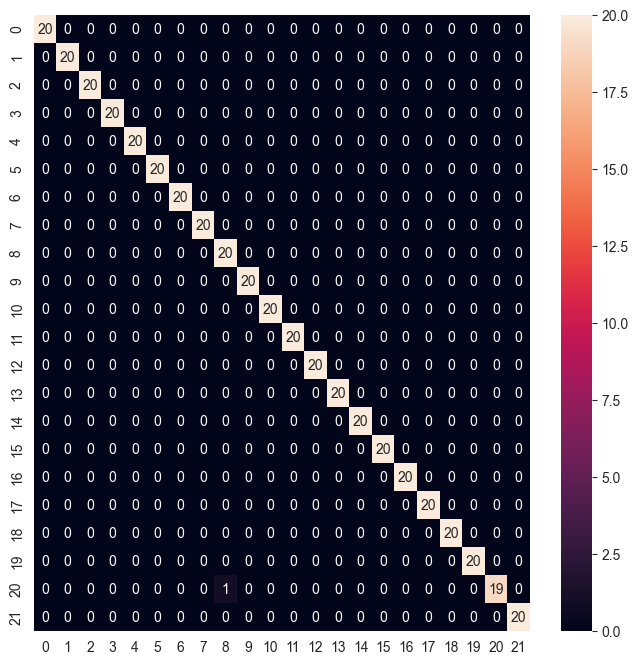

In [135]:
y_pred = boostingrf.predict(x_test)
matrix(boostingrf,y_pred)

## Voting

In [136]:
from sklearn.ensemble import VotingClassifier

In [137]:
# Create a voting classifier with hard voting
voting_hard = VotingClassifier(estimators=[('boostingrf', boostingrf), ('baggingsvm', baggingsvm), ('boostingdl', boostingdl)], voting='hard')

# Create a voting classifier with soft voting
voting_soft = VotingClassifier(estimators=[('boostingrf', boostingrf), ('baggingsvm', baggingsvm), ('boostingdl', boostingdl)], voting='soft')

# Fit the voting classifiers on the training data
voting_hard.fit(x_train, y_train)
voting_soft.fit(x_train, y_train)

VotingClassifier(estimators=[('boostingrf',
                              AdaBoostClassifier(estimator=BaggingClassifier(estimator=RandomForestClassifier(n_estimators=300,
                                                                                                              random_state=50),
                                                                             n_estimators=30,
                                                                             random_state=50),
                                                 n_estimators=30)),
                             ('baggingsvm',
                              BaggingClassifier(estimator=SVC(C=1000.0,
                                                              probability=True),
                                                n_estimators=30,
                                                random_state=22)),
                             ('boostingdl',
                              AdaBoostClassifier(estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                                                             n_estimators=30,
                                                                             random_state=50),
                                                 n_estimators=30))],
                 voting='soft')

In [138]:
print("Hard Voting")
print("Train Data : ",accuracy_score(y_true = y_train, y_pred = voting_hard.predict(x_train)))
print("Test Data : ",accuracy_score(y_true = y_test, y_pred = voting_hard.predict(x_test)))

Hard Voting
Train Data :  1.0
Test Data :  0.9977272727272727


In [139]:
print("soft Voting")
print("Train Data : ",accuracy_score(y_true = y_train, y_pred = voting_hard.predict(x_train)))
print("Test Data : ",accuracy_score(y_true = y_test, y_pred = voting_soft.predict(x_test)))

soft Voting
Train Data :  1.0
Test Data :  0.9954545454545455


voting_soft

Accuracy : 0.9954545454545455
Classification Report 
:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00  

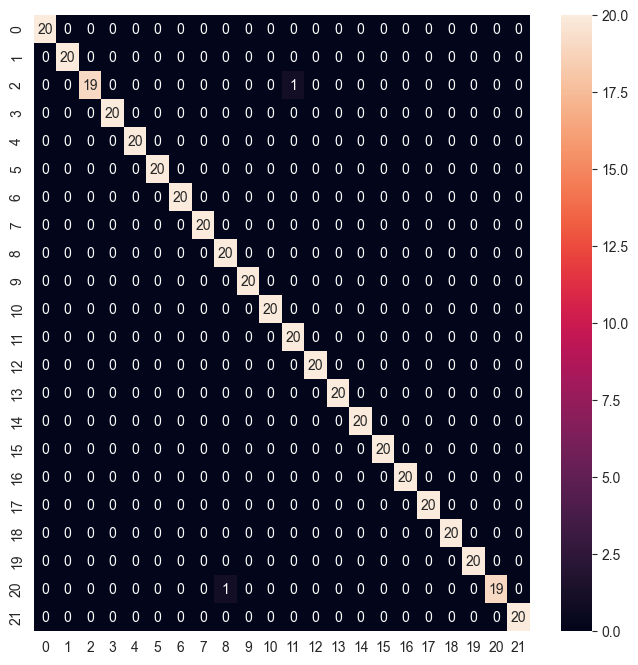

In [140]:
y_pred = voting_soft.predict(x_test)
matrix(voting_soft,y_pred)

voting_hard

Accuracy : 0.9977272727272727
Classification Report 
:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00  

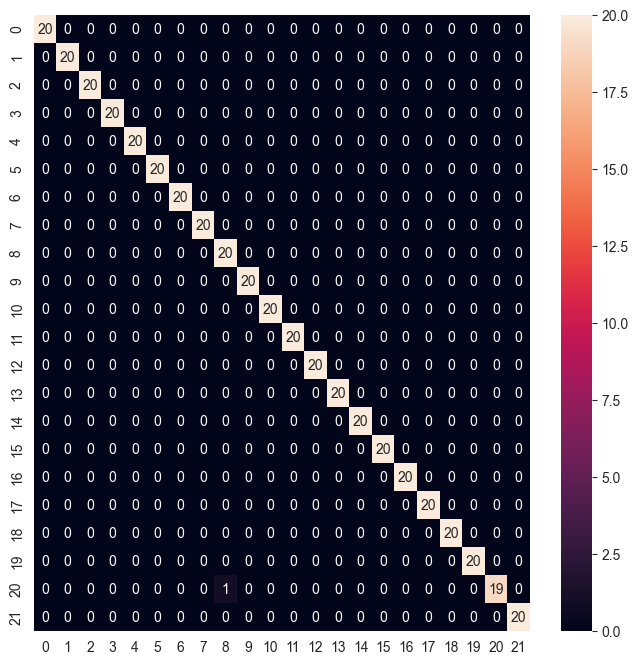

In [141]:
y_pred = voting_hard.predict(x_test)
matrix(voting_hard,y_pred)

In [142]:
voting_hard

VotingClassifier(estimators=[('boostingrf',
                              AdaBoostClassifier(estimator=BaggingClassifier(estimator=RandomForestClassifier(n_estimators=300,
                                                                                                              random_state=50),
                                                                             n_estimators=30,
                                                                             random_state=50),
                                                 n_estimators=30)),
                             ('baggingsvm',
                              BaggingClassifier(estimator=SVC(C=1000.0,
                                                              probability=True),
                                                n_estimators=30,
                                                random_state=22)),
                             ('boostingdl',
                              AdaBoostClassifier(estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                                                             n_estimators=30,
                                                                             random_state=50),
                                                 n_estimators=30))])

In [143]:
voting_soft

VotingClassifier(estimators=[('boostingrf',
                              AdaBoostClassifier(estimator=BaggingClassifier(estimator=RandomForestClassifier(n_estimators=300,
                                                                                                              random_state=50),
                                                                             n_estimators=30,
                                                                             random_state=50),
                                                 n_estimators=30)),
                             ('baggingsvm',
                              BaggingClassifier(estimator=SVC(C=1000.0,
                                                              probability=True),
                                                n_estimators=30,
                                                random_state=22)),
                             ('boostingdl',
                              AdaBoostClassifier(estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                                                             n_estimators=30,
                                                                             random_state=50),
                                                 n_estimators=30))],
                 voting='soft')

## Prediction

In [144]:
sample=np.array([60,38,29,25,23,3,426,7586]).reshape(1,-1)

In [145]:
y_pred= voting_hard.predict(sample)
lab1=label_encoder.inverse_transform(y_pred)
lab1

C:\Users\cyril\OneDrive\Pictures\SEM 6\assignment\New\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\cyril\OneDrive\Pictures\SEM 6\assignment\New\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
C:\Users\cyril\OneDrive\Pictures\SEM 6\assignment\New\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array(['Coffee'], dtype=object)

In [146]:
lab2=label_encoder.inverse_transform(y_pred)
lab2

array(['Coffee'], dtype=object)

## Saving The Model

In [147]:
import pickle

In [148]:
# save the model as a file
with open('model.pkl', 'wb') as file:
    pickle.dump(voting_hard, file)

In [149]:
# load the saved model from file
model = pickle.load(open('/content/model.pkl', 'rb'))
